In [67]:
!pip install pandas
!pip install wget
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Análisis Exploratorio Inicial

### 1. Carga del dataset
- Lectura de los archivos `horse-colic.data` y `horse-colic.test`.
- Unificación en un solo DataFrame

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wget import download
from os import path, listdir
import zipfile

#descargamos el dataset
if not path.exists('horse-colic.data'):
    if not path.exists('horse-colic.zip'):
        download('https://archive.ics.uci.edu/static/public/47/horse+colic.zip')
    with zipfile.ZipFile('horse+colic.zip', 'r') as zip_ref:
        zip_ref.extractall()
        print('Archivo descomprimido correctamente')
else:
    print('El archivo ya está disponible.')

# Nombres de columnas según la documentación fuente
nombres_columnas = [
    "cirugía", "Edad", "Número_hospital", "temperatura_rectal", "pulso", "frecuencia_respiratoria",
    "temperatura_extremidades", "pulso_periférico", "membranas_mucosas", "llenado_capilar",
    "dolor", "peristalsis", "distensión_abdominal", "sonda_nasogástrica",
    "reflujo_nasogástrico", "ph_reflujo_nasogástrico", "heces_examen_rectal", "abdomen",
    "vol_cel_empaquetado", "proteína_total", "apariencia_abdominocentesis",
    "proteína_total_abdominocentesis", "resultado", "lesión_quirúrgica",
    "sitio_lesión", "tipo_lesión", "subtipo_lesión", "cp_data"
] 

# Función para leer archivos correctamente
def read_colic_file(filename):
    return pd.read_csv(filename, sep=r'\s+', names=nombres_columnas, na_values='?', engine='python')


#leemos los archivos .data y .test
raw_dataset_data = read_colic_file('horse-colic.data')
raw_dataset_test = read_colic_file('horse-colic.test')

# Añadimos columnas del archivo origen de los datos
raw_dataset_data['Fuente'] = 'data'
raw_dataset_test['Fuente']  = 'test'


#para simplicidad, unimos ambos datasets en uno solo
raw_dataset = pd.concat([raw_dataset_data, raw_dataset_test], ignore_index = True)

# Vemos las primeras filas
display(raw_dataset.head())

# Información general de tipos y valores nulos
display(raw_dataset.info())

# Estadísticas descriptivas de variables numéricas
display(raw_dataset.describe())

El archivo ya está disponible.


,cirugía,Edad,Número_hospital,temperatura_rectal,pulso,frecuencia_respiratoria,temperatura_extremidades,pulso_periférico,membranas_mucosas,llenado_capilar,...,proteína_total,apariencia_abdominocentesis,proteína_total_abdominocentesis,resultado,lesión_quirúrgica,sitio_lesión,tipo_lesión,subtipo_lesión,cp_data,Fuente
0,2.00,1,530101,38.50,66.00,28.00,3.00,3.00,NaN,2.00,...,8.40,NaN,NaN,2.00,2,11300,0,0,2,data
1,1.00,1,534817,39.20,88.00,20.00,NaN,NaN,4.00,1.00,...,85.00,2.00,2.00,3.00,2,2208,0,0,2,data
2,2.00,1,530334,38.30,40.00,24.00,1.00,1.00,3.00,1.00,...,6.70,NaN,NaN,1.00,2,0,0,0,1,data
3,1.00,9,5290409,39.10,164.00,84.00,4.00,1.00,6.00,2.00,...,7.20,3.00,5.30,2.00,1,2208,0,0,1,data
4,2.00,1,530255,37.30,104.00,35.00,NaN,NaN,6.00,2.00,...,7.40,NaN,NaN,2.00,2,4300,0,0,2,data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cirugía                          366 non-null    float64
 1   Edad                             368 non-null    int64  
 2   Número_hospital                  368 non-null    int64  
 3   temperatura_rectal               299 non-null    float64
 4   pulso                            342 non-null    float64
 5   frecuencia_respiratoria          297 non-null    float64
 6   temperatura_extremidades         303 non-null    float64
 7   pulso_periférico                 285 non-null    float64
 8   membranas_mucosas                320 non-null    float64
 9   llenado_capilar                  330 non-null    float64
 10  dolor                            305 non-null    float64
 11  peristalsis                      316 non-null    float64
 12  distensión_abdominal  

None

,cirugía,Edad,Número_hospital,temperatura_rectal,pulso,frecuencia_respiratoria,temperatura_extremidades,pulso_periférico,membranas_mucosas,llenado_capilar,...,vol_cel_empaquetado,proteína_total,apariencia_abdominocentesis,proteína_total_abdominocentesis,resultado,lesión_quirúrgica,sitio_lesión,tipo_lesión,subtipo_lesión,cp_data
count,366.00,368.00,368.00,299.00,342.00,297.00,303.00,285.00,320.00,330.00,...,331.00,325.00,174.00,133.00,366.00,368.00,368.00,368.00,368.00,368.00
mean,1.42,1.61,1112333.86,38.13,70.76,30.52,2.36,1.96,2.83,1.30,...,45.66,24.77,2.05,2.95,1.53,1.37,3650.83,96.97,6.00,1.66
std,0.49,2.12,1560122.09,0.71,28.09,17.67,1.04,1.05,1.59,0.47,...,10.87,27.70,0.80,1.93,0.73,0.48,5360.22,640.51,115.15,0.47
min,1.00,1.00,514279.00,35.40,30.00,8.00,1.00,1.00,1.00,1.00,...,4.00,3.30,1.00,0.10,1.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,1.00,528915.25,37.80,48.00,18.00,1.00,1.00,1.00,1.00,...,37.25,6.50,1.00,2.00,1.00,1.00,2111.75,0.00,0.00,1.00
50%,1.00,1.00,530299.00,38.10,60.00,28.00,3.00,1.00,3.00,1.00,...,44.00,7.50,2.00,2.10,1.00,1.00,3025.00,0.00,0.00,2.00
75%,2.00,1.00,534727.50,38.50,88.00,36.00,3.00,3.00,4.00,2.00,...,52.00,58.00,3.00,3.90,2.00,2.00,3209.00,0.00,0.00,2.00
max,2.00,9.00,5305629.00,40.80,184.00,96.00,4.00,4.00,6.00,3.00,...,75.00,89.00,3.00,10.10,3.00,2.00,41110.00,7111.00,2209.00,2.00


### 1.1 Análisis de valores faltantes
Se creó una copia del dataset original para preservar los datos sin modificaciones.  
Se verificó que los valores faltantes estén correctamente representados como `NaN`, y se contó su frecuencia por columna.

In [69]:
#creamos una copia del dataset original para preservar los datos crudos
preprocessed_dataset = raw_dataset.copy()

#confirmamos que los valores faltantes esten representados como Nan
preprocessed_dataset.replace('?', np.nan, inplace = True)

#contamos los valores faltantes por columna y los ordenamos
valores_faltantes = preprocessed_dataset.isna().sum().sort_values(ascending = False)

# Mostramos las 10 columnas con más valores nulos
valores_faltantes.head(28)

ph_reflujo_nasogástrico            299
proteína_total_abdominocentesis    235
apariencia_abdominocentesis        194
abdomen                            143
reflujo_nasogástrico               133
sonda_nasogástrica                 131
heces_examen_rectal                128
pulso_periférico                    83
frecuencia_respiratoria             71
temperatura_rectal                  69
distensión_abdominal                65
temperatura_extremidades            65
dolor                               63
peristalsis                         52
membranas_mucosas                   48
proteína_total                      43
llenado_capilar                     38
vol_cel_empaquetado                 37
pulso                               26
cirugía                              2
resultado                            2
Número_hospital                      0
Edad                                 0
lesión_quirúrgica                    0
sitio_lesión                         0
tipo_lesión              

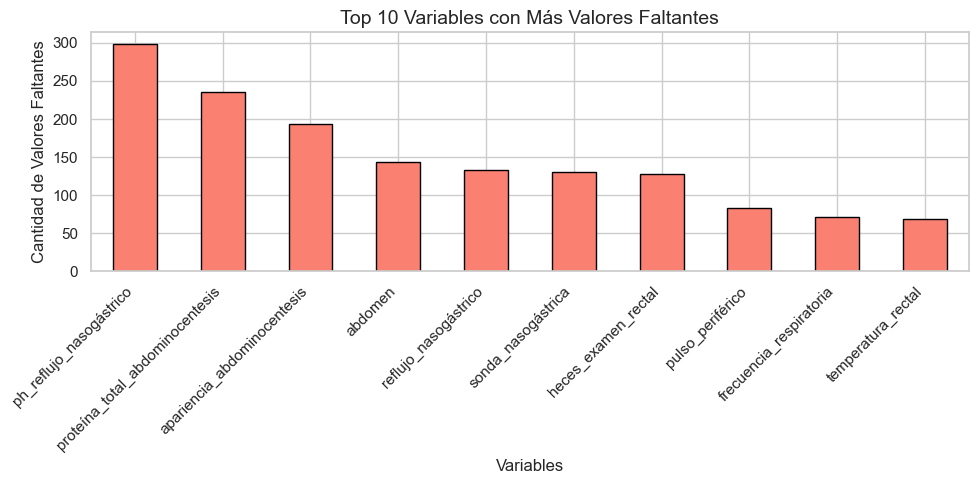

In [70]:
# Tomamos las 10 variables con más valores faltantes
top_valores_faltantes = preprocessed_dataset.isna().sum().sort_values(ascending=False).head(10)

# Creamos el gráfico
plt.figure(figsize=(10,5))
top_valores_faltantes.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Variables con Más Valores Faltantes', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Cantidad de Valores Faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.2 Análisis de la distribucion de variables
Analizo las variables mas importantes(resultado y lesion quirurgica, dolor, distension abdominal, temperatura de extremidades, pulso y temperatura rectal)
UNIVARIADAS

C:\Users\ACER\AppData\Local\Temp\ipykernel_1448\4007835813.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Vivió', 'Murió', 'Fue Eutanasiado'])


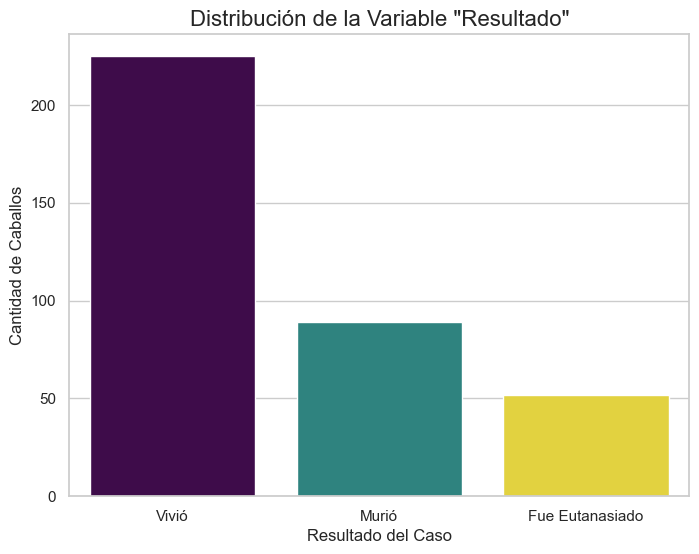

C:\Users\ACER\AppData\Local\Temp\ipykernel_1448\4007835813.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Sí', 'No'])


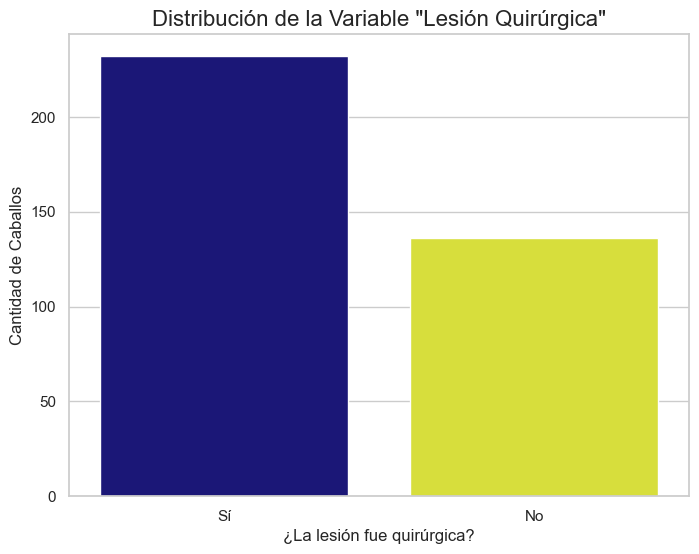

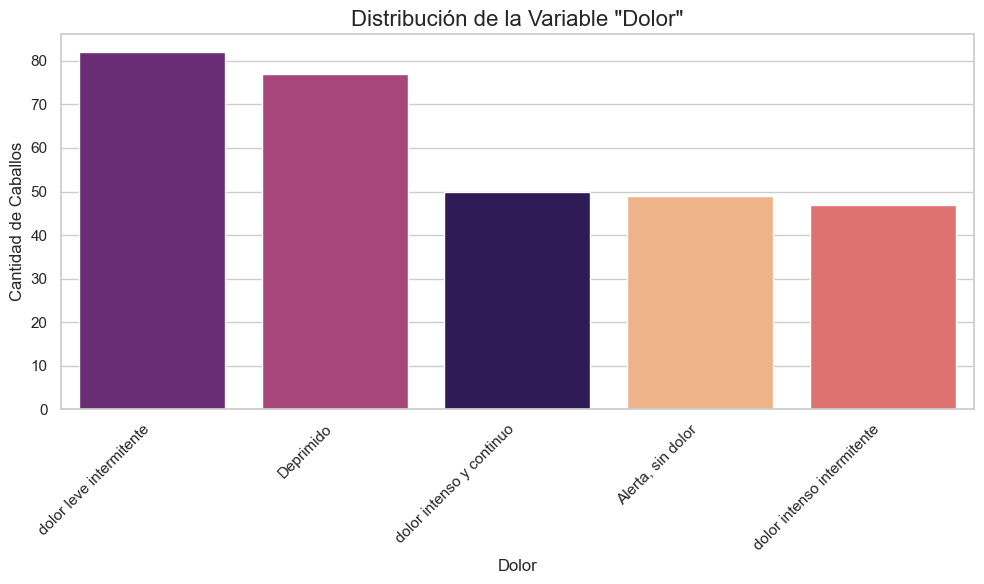

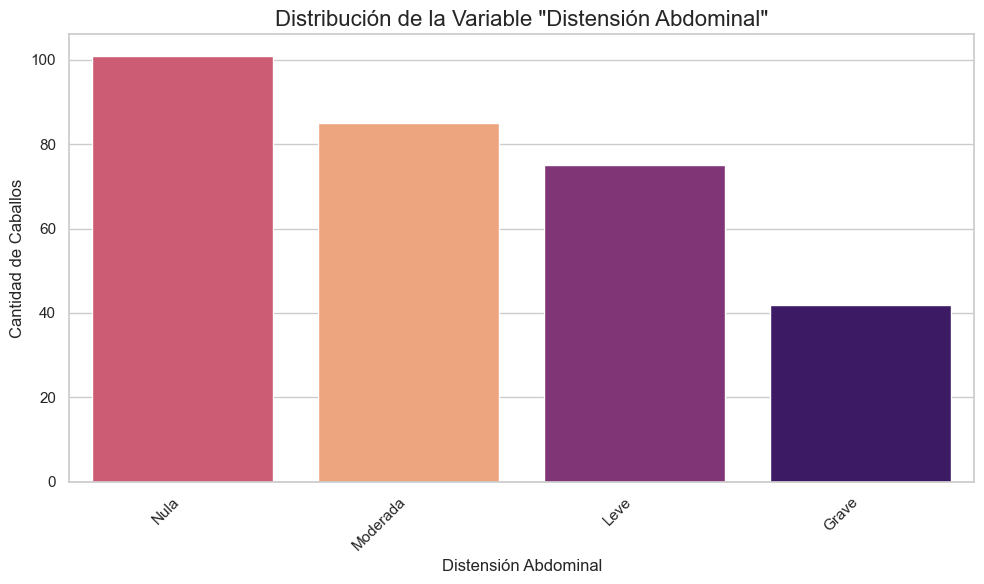

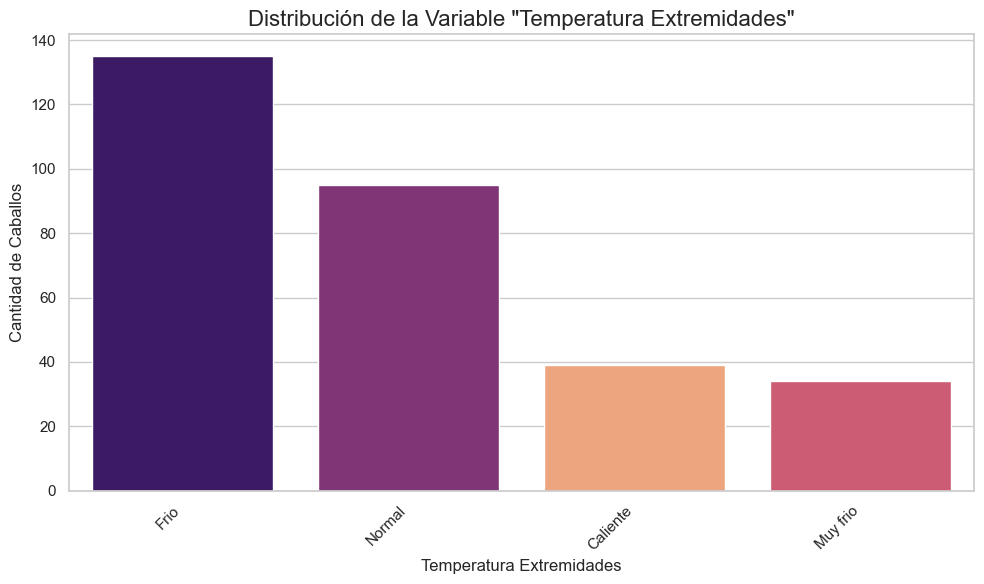

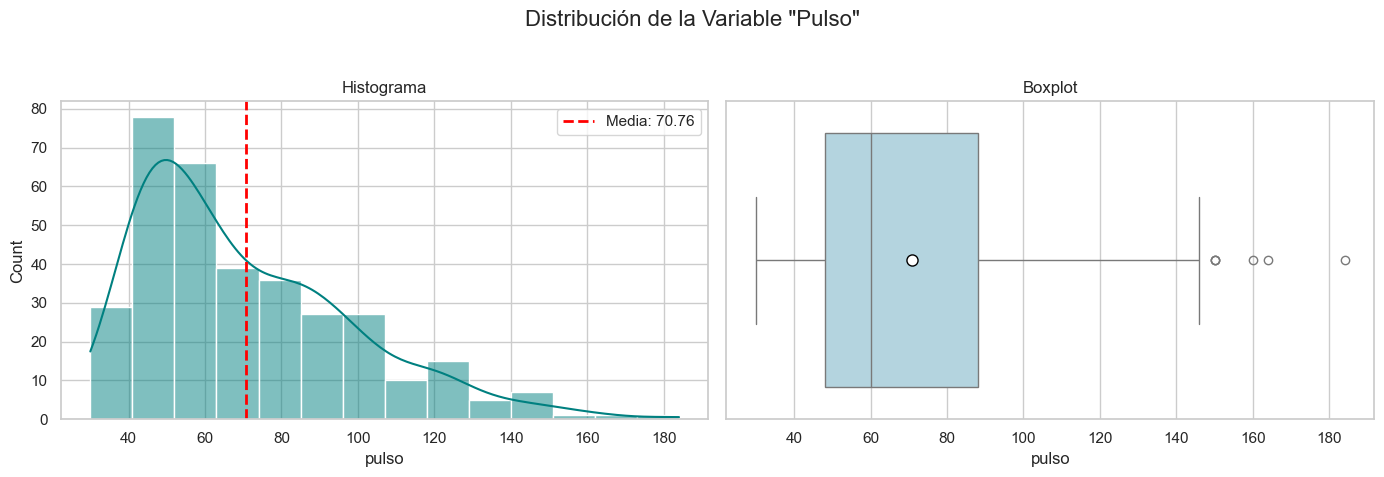

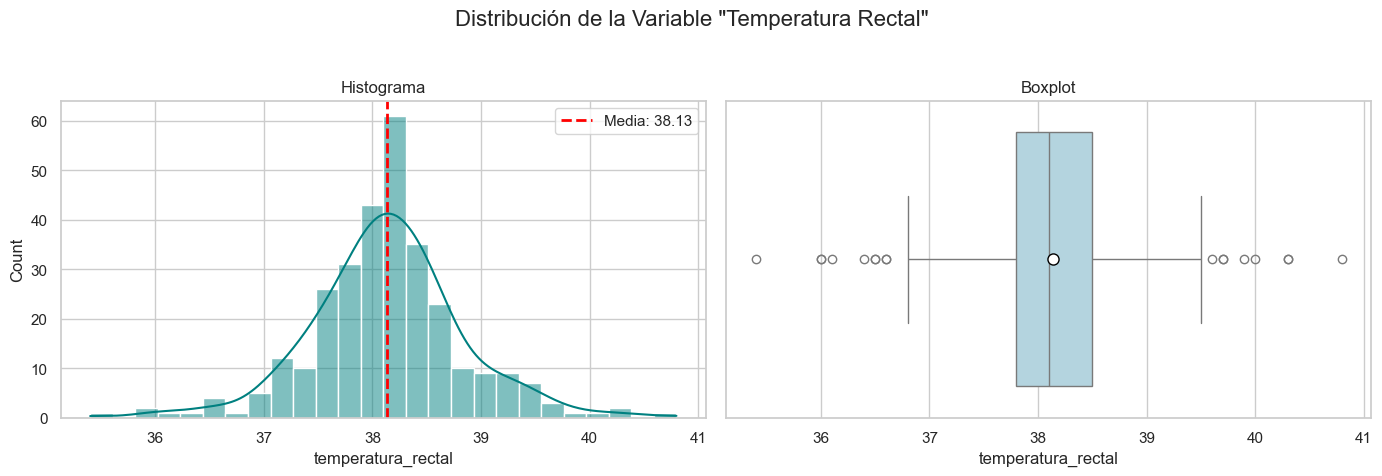

In [71]:
sns.set_theme(style="whitegrid")


#GRAFICO DE BARRA PARA LA VARIABLE RESULTADO
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(
    data=preprocessed_dataset,
    x='resultado',
    hue='resultado', 
    palette='viridis',
    order=preprocessed_dataset['resultado'].value_counts().index,
    legend=False 
)
ax1.set_title('Distribución de la Variable "Resultado"', fontsize=16)
ax1.set_xlabel('Resultado del Caso', fontsize=12)
ax1.set_ylabel('Cantidad de Caballos', fontsize=12)
ax1.set_xticklabels(['Vivió', 'Murió', 'Fue Eutanasiado'])
plt.show()


#GRAFICO DE BARRA PARA LA VARIABLE LESION QUIRURGICA
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(
    data=preprocessed_dataset,
    x='lesión_quirúrgica',
    hue='lesión_quirúrgica', 
    palette='plasma',
    order=preprocessed_dataset['lesión_quirúrgica'].value_counts().index,
    legend=False 
)
ax2.set_title('Distribución de la Variable "Lesión Quirúrgica"', fontsize=16)
ax2.set_xlabel('¿La lesión fue quirúrgica?', fontsize=12)
ax2.set_ylabel('Cantidad de Caballos', fontsize=12)
ax2.set_xticklabels(['Sí', 'No'])
plt.show()


#GRAFICOS VARIABLES CATEGORICAS (DOLOR,DISTENSION_ABDOMINAL, TEMPERATURA_EXTREMIDADES)
mapa_dolor = {
    1: 'Alerta, sin dolor',
    2: 'Deprimido',
    3: 'dolor leve intermitente',
    4: 'dolor intenso intermitente',
    5: 'dolor intenso y continuo'
}

mapa_distension = {
    1: 'Nula',
    2: 'Leve',
    3: 'Moderada',
    4: 'Grave'
}

mapa_temperatura_ext = {
    1: 'Normal',
    2: 'Caliente',
    3: 'Frio',
    4: 'Muy frio'
}

# Agrupamos todos los mapas en un solo diccionario para usarlos en el bucle
mapeos = {
    'dolor': mapa_dolor,
    'distensión_abdominal': mapa_distension,
    'temperatura_extremidades': mapa_temperatura_ext
}



variables_categoricas = ['dolor', 'distensión_abdominal', 'temperatura_extremidades']

for variable in variables_categoricas:
    plt.figure(figsize=(10, 6))

    # Creamos una copia temporal de la columna con los nombres ya traducidos
    columna_mapeada = preprocessed_dataset[variable].map(mapeos[variable])

    ax = sns.countplot(
        x=columna_mapeada, # Usamos la nueva columna con las etiquetas de texto
        palette='magma',
        order=columna_mapeada.value_counts().index, # Ordenamos por frecuencia
        hue=columna_mapeada, 
        legend=False
    )
    ax.set_title(f'Distribución de la Variable "{variable.replace("_", " ").title()}"', fontsize=16)
    ax.set_xlabel(variable.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel('Cantidad de Caballos', fontsize=12)
    
    # Rotamos las etiquetas del eje X para que no se superpongan si son largas
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout() 
    plt.show()


#GRAFICOS VARIABLES NUMERICAS (PULSO, TEMPOERATURA RECTAL)
variables_numericas = ['pulso', 'temperatura_rectal']


# Bucle para crear un histograma y un boxplot para cada variable numérica
for variable in variables_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Distribución de la Variable "{variable.replace("_", " ").title()}"', fontsize=16)

    # --- Histograma con línea de la media ---
    sns.histplot(data=preprocessed_dataset, x=variable, kde=True, ax=axes[0], color='teal')
    axes[0].set_title('Histograma')
    
    # Calculamos la media y la añadimos como una línea vertical
    media = preprocessed_dataset[variable].mean()
    axes[0].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    axes[0].legend() 

    # --- Boxplot con marcador para la media ---
    sns.boxplot(
        data=preprocessed_dataset, 
        x=variable, 
        ax=axes[1], 
        color='lightblue',
        showmeans=True, 
        meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                   "markersize":"8"}
    )
    axes[1].set_title('Boxplot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### 2. Limpieza de la base
realizamos el manejo de los valores faltante(Nan) y de los valores atipicos(Outliers)

### 2.1 tratamiento de columnas con gran cantidad de nulos
realizamos la eliminacion de las columnas con gran cantidad de valores nulos y el tratamiento de los nulos de las columnas que nos sirven mediante diferentes tecnicas segun el tipo de variable

In [72]:
#creamos una copia del dataframe para no perder el original
df_limpio = preprocessed_dataset.copy()

#realizamos una lista de las columnas a eliminar ya que son imposibles de imputar debido a la presencia de tantos nulos
columnas_a_eliminar = ['ph_reflujo_nasogástrico', 'proteína_total_abdominocentesis','apariencia_abdominocentesis']

#eliminamos las columnas
df_limpio = df_limpio.drop(columns=columnas_a_eliminar)

#Imputación de Variables Numéricas (con MEDIANA)
columnas_numericas_a_imputar = [
    'temperatura_rectal',
    'pulso',
    'frecuencia_respiratoria', 
    'vol_cel_empaquetado', 
    'proteína_total'
]

for col in columnas_numericas_a_imputar:
    mediana = df_limpio[col].median()
    df_limpio[col] = df_limpio[col].fillna(mediana)
print(f"Paso 2: {len(columnas_numericas_a_imputar)} variables numéricas imputadas con su MEDIANA.")


# Imputación de Variables Categóricas (con MODA)
columnas_categoricas_a_imputar = [
    'temperatura_extremidades', 
    'pulso_periférico', 
    'membranas_mucosas',
    'llenado_capilar',
    'dolor',
    'peristalsis',
    'distensión_abdominal',
    'sonda_nasogástrica',
    'reflujo_nasogástrico',
    'heces_examen_rectal',
    'abdomen',
]

for col in columnas_categoricas_a_imputar:
    moda = df_limpio[col].mode()[0] 
    df_limpio[col] = df_limpio[col].fillna(moda)

print(f"Paso 3: {len(columnas_categoricas_a_imputar)} variables categóricas imputadas con su MODA.")

#para las variables resultado y cirugia optamos por eliminar las dos filas con nulos
# Eliminamos las filas donde 'resultado' o 'cirugía' sean nulos
df_limpio = df_limpio.dropna(subset=['resultado', 'cirugía'])
print("Filas con nulos en 'resultado' y 'cirugía' eliminadas.")

# 5. Verificación Final
print("\n--- Verificación Final de Nulos ---")
print(df_limpio.isnull().sum())




Paso 2: 5 variables numéricas imputadas con su MEDIANA.
Paso 3: 11 variables categóricas imputadas con su MODA.
Filas con nulos en 'resultado' y 'cirugía' eliminadas.

--- Verificación Final de Nulos ---
cirugía                     0
Edad                        0
Número_hospital             0
temperatura_rectal          0
pulso                       0
frecuencia_respiratoria     0
temperatura_extremidades    0
pulso_periférico            0
membranas_mucosas           0
llenado_capilar             0
dolor                       0
peristalsis                 0
distensión_abdominal        0
sonda_nasogástrica          0
reflujo_nasogástrico        0
heces_examen_rectal         0
abdomen                     0
vol_cel_empaquetado         0
proteína_total              0
resultado                   0
lesión_quirúrgica           0
sitio_lesión                0
tipo_lesión                 0
subtipo_lesión              0
cp_data                     0
Fuente                      0
dtype: int64


### 3 Análisis BIVARIADO
Realizamos el mapa de calor junto con los coeficientes de correlacion para analizar la relacion entre las variables

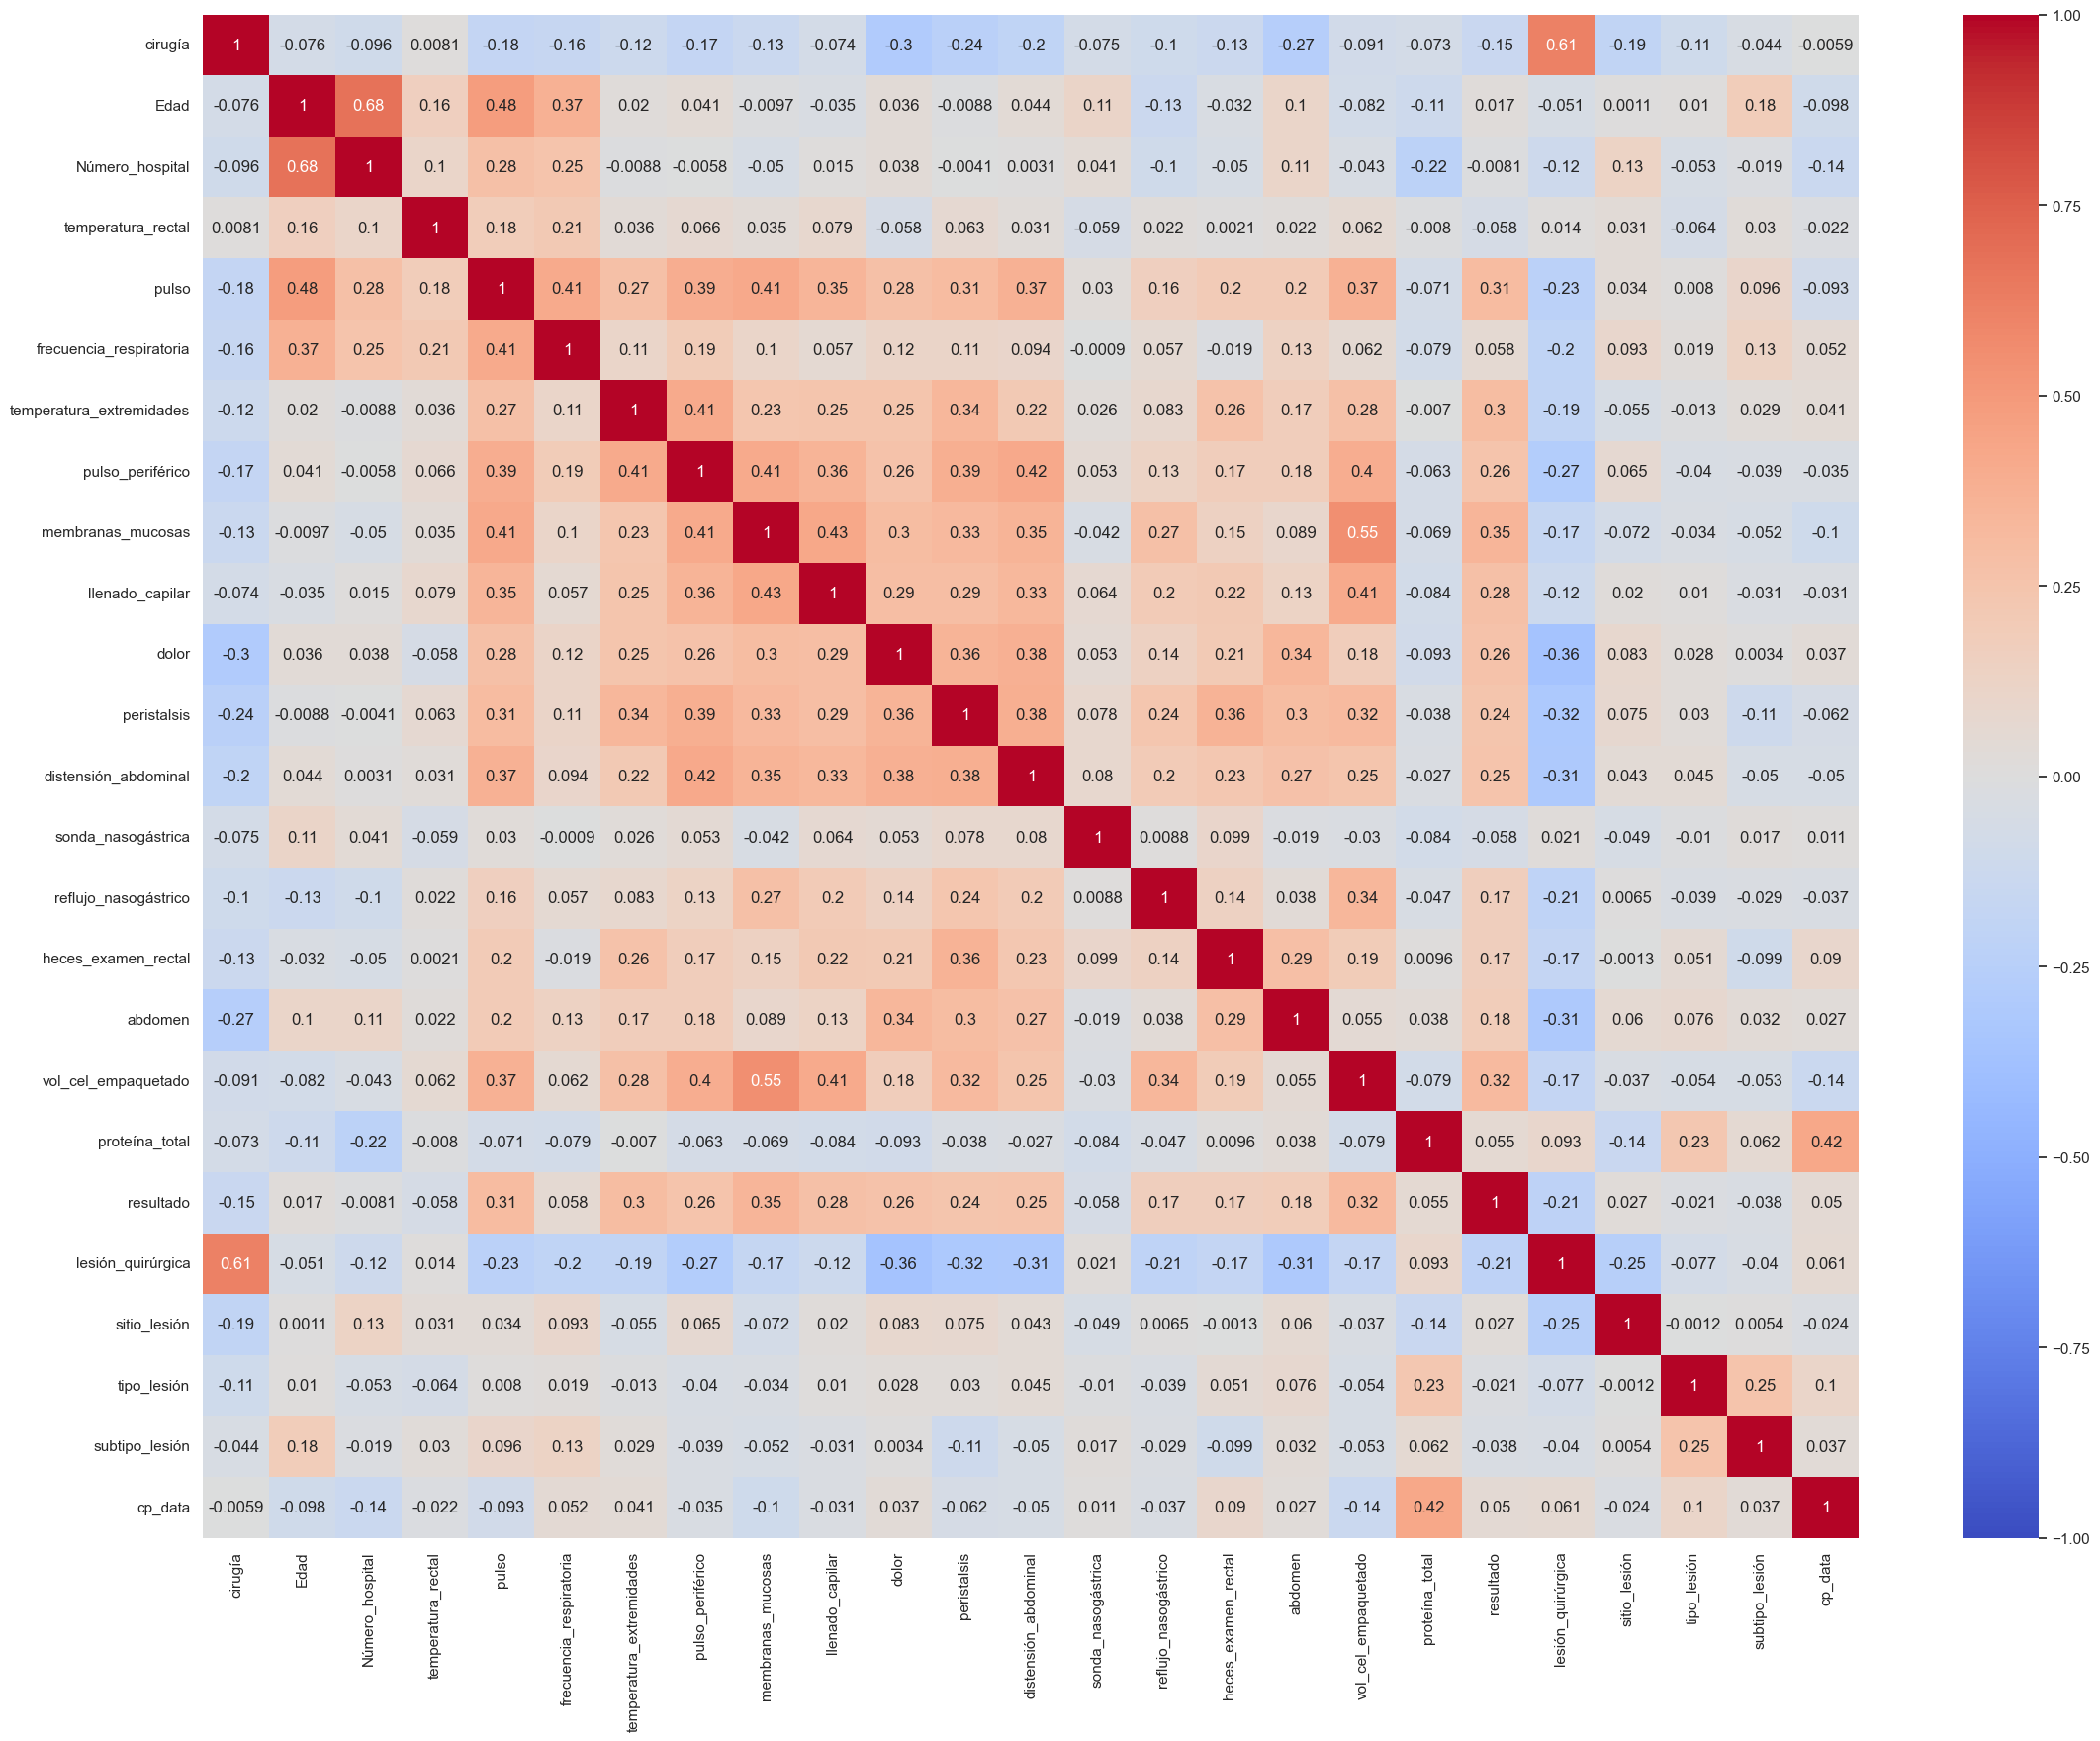

In [73]:
# calculamos las correlaciones
# select_dtypes se utiliza para filtrar las variables que son numericas
mat_correlacion = df_limpio.select_dtypes(include=[float,int]).corr()

plt.figure(figsize=(27,20))
sns.heatmap(mat_correlacion, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

### 3.1 Análisis BIVARIADO
realizamos un analisis de agrupamiento mediante el metodo T-SNE para luego identificar clusters

Datos preparados (sin pulso ni resultados). Forma: (366, 36)
After T_SNE: (366, 2)


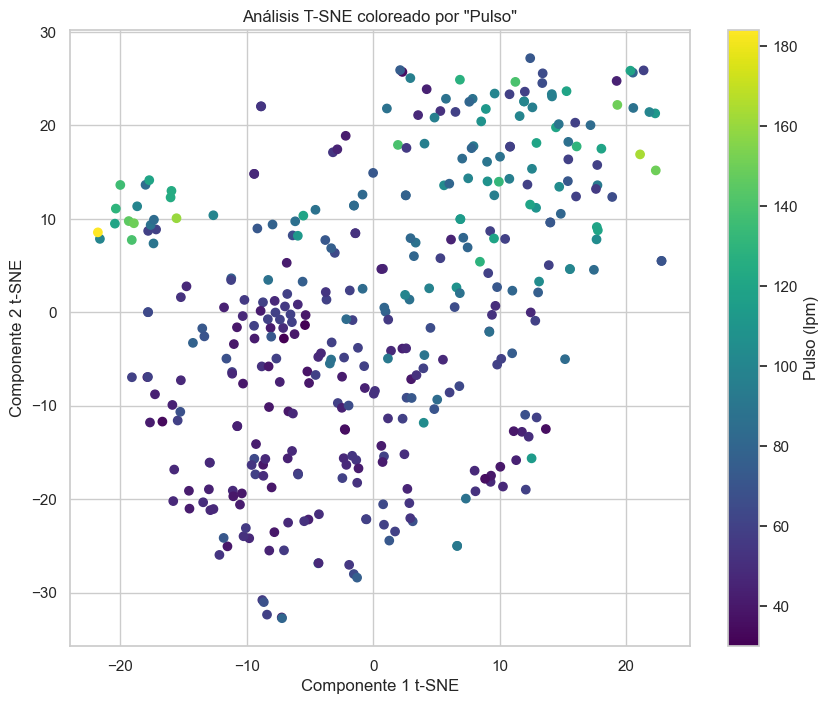

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# --- 1. PREPARAMOS LOS DATOS ---

# Variables a usar (excluimos 'pulso' porque será nuestra variable para colorear)
# También excluimos las variables de "resultado" (como 'resultado', 'cirugía')
# porque queremos ver si 'pulso' se relaciona con los SIGNOS CLÍNICOS.

# Numéricas
columnas_num = [
    'temperatura_rectal', 
    'frecuencia_respiratoria', 
    'vol_cel_empaquetado', 
    'proteína_total'
]

# Categóricas 
columnas_cat = [
    'Edad', 
    'dolor', 
    'temperatura_extremidades', 
    'peristalsis', 
    'distensión_abdominal',
    'pulso_periférico',
    'membranas_mucosas',
    'llenado_capilar'
]

# Creamos el dataframe para este análisis
data_redux = df_limpio[columnas_num + columnas_cat].copy()

# Nos aseguramos que las categóricas sean 'str'
for col in columnas_cat:
    data_redux[col] = data_redux[col].astype(str) 

# Convertimos categóricas a dummies
data_redux_dummies = pd.get_dummies(data_redux, columns=columnas_cat)


# --- 2. ESTANDARIZAMOS
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_redux_dummies)

print(f"Datos preparados (sin pulso ni resultados). Forma: {data_scaled.shape}")


# --- 3. APLICAMOS T-SNE ---
tsne = TSNE(n_components=2, random_state=10, perplexity=30) 
tsne_results = tsne.fit_transform(data_scaled)

print(f'After T_SNE: {tsne_results.shape}')


# --- 4. GRAFICAMOS Coloreando por pulso ---
plt.figure(figsize=(10, 8))
plt.scatter(
    tsne_results[:,0],  # Componente 1 de T-SNE
    tsne_results[:,1],  # Componente 2 de T-SNE
    c=df_limpio["pulso"], # Coloreamos por el pulso
    cmap='viridis'      # Mapa de color 
)

plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Componente 2 t-SNE')
plt.title('Análisis T-SNE coloreado por "Pulso"')
plt.colorbar(label='Pulso (lpm)') # Agregamos la barra de color
plt.show()

### 3.2 Análisis BIVARIADO, buscamos la cantidad de clusters
realizamos el grafico del codo para determinar la cantidad de grupos que nos conviene para luego implementar el algoritmo k-means

Datos preparados para K-Means. Nueva forma: (366, 31)


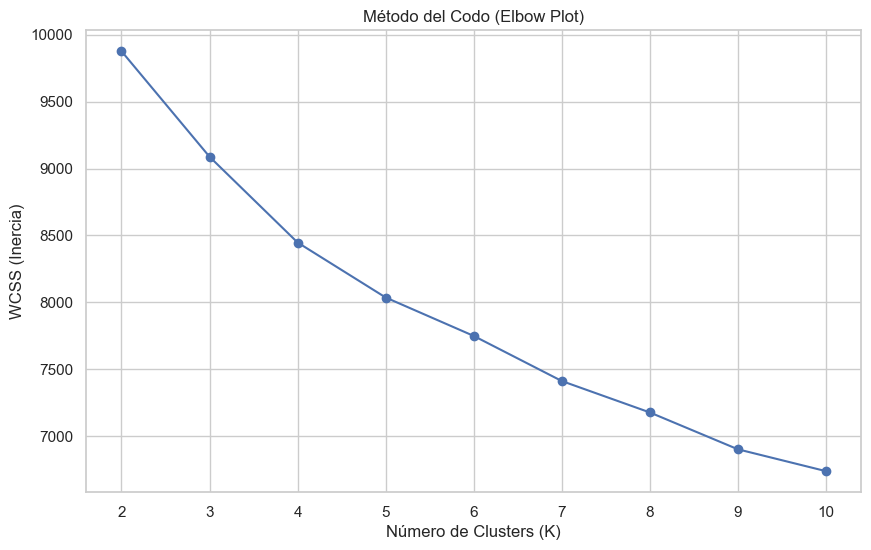

In [75]:
from sklearn.cluster import KMeans
columnas_num = [
    'temperatura_rectal', 
    'pulso',  
    'frecuencia_respiratoria', 
    'vol_cel_empaquetado', 
    'proteína_total'
]

columnas_cat = [
    'cirugía',  
    'Edad', 
    'dolor', 
    'temperatura_extremidades', 
    'peristalsis', 
    'distensión_abdominal', 
    'resultado', 
    'lesión_quirúrgica'
]

# Hacemos una copia solo con las columnas que nos interesan
df_para_kmeans = df_limpio[columnas_num + columnas_cat].copy()

# Nos aseguramos que las categóricas sean tratadas como 'str'
for col in columnas_cat:
    df_para_kmeans[col] = df_para_kmeans[col].astype(str) 

# Convertimos categóricas a dummies
df_procesado_kmeans = pd.get_dummies(df_para_kmeans, columns=columnas_cat)


# --- 2. ESCALAMOS LOS DATOS ---
scaler_kmeans = StandardScaler()
datos_escalados_kmeans = scaler_kmeans.fit_transform(df_procesado_kmeans)

print(f"Datos preparados para K-Means. Nueva forma: {datos_escalados_kmeans.shape}")

wcss = []  

# Probamos K de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10) 
    kmeans.fit(datos_escalados_kmeans)
    wcss.append(kmeans.inertia_) 

# --- 4. GRAFICAR EL CODO ---
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o') # Graficamos K vs WCSS
plt.title('Método del Codo (Elbow Plot)')
plt.grid(True)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inercia)')
plt.show()

### 3.3 Análisis BIVARIADO, aplicamos k-means
realizamos el grafico del algoritmo k-means

In [76]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) # Para que los números salgan lindos

# --- 1. PERFIL NUMÉRICO ---
# (Usamos las numéricas
columnas_num_perfil = ['pulso', 'temperatura_rectal', 'frecuencia_respiratoria', 'vol_cel_empaquetado']

# Agrupamos por cluster y calculamos la MEDIANA 
perfil_numerico = df_con_clusters.groupby('Cluster')[columnas_num_perfil].median()

print("--- 1. PERFIL NUMÉRICO (Mediana de cada variable por Cluster) ---")
print(perfil_numerico)
print("\n" + "-"*60 + "\n")


# --- 2. PERFIL CATEGÓRICO  ---
# Usamos .value_counts(normalize=True) para ver PORCENTAJES
perfil_resultado = df_con_clusters.groupby('Cluster')['resultado'].value_counts(normalize=True).unstack(fill_value=0)

# Mapeamos los códigos a etiquetas para que sea legible
mapa_resultado = {'1': 'Vivió', '2': 'Murió', '3': 'Eutanasiado'}
perfil_resultado = perfil_resultado.rename(columns=mapa_resultado)

print("--- 2. PERFIL CATEGÓRICO (% de Resultado por Cluster) ---")
print(perfil_resultado.to_string(float_format="%.2f")) 
print("\n" + "-"*60 + "\n")


# --- 3. PERFIL CATEGÓRICO Dolor ---
perfil_dolor = df_con_clusters.groupby('Cluster')['dolor'].value_counts(normalize=True).unstack(fill_value=0)

# Mapeamos los códigos a etiquetas para que sea legible
mapa_dolor = {
    '1': 'Sin Dolor',
    '2': 'Deprimido',
    '3': 'Dolor Leve',
    '4': 'Dolor Intenso',
    '5': 'Dolor Continuo'
}
perfil_dolor = perfil_dolor.rename(columns=mapa_dolor)

print("--- 3. PERFIL CATEGÓRICO (% de Dolor por Cluster) ---")
print(perfil_dolor.to_string(float_format="%.2f"))

--- 1. PERFIL NUMÉRICO (Mediana de cada variable por Cluster) ---
         pulso  temperatura_rectal  frecuencia_respiratoria  \
Cluster                                                       
0        70.00               38.10                    28.00   
1       120.00               38.30                    46.00   
2        48.00               38.10                    24.00   

         vol_cel_empaquetado  
Cluster                       
0                      45.00  
1                      42.00  
2                      42.00  

------------------------------------------------------------

--- 2. PERFIL CATEGÓRICO (% de Resultado por Cluster) ---
resultado  1.00  2.00  3.00
Cluster                    
0          0.45  0.33  0.22
1          0.46  0.50  0.04
2          0.93  0.03  0.03

------------------------------------------------------------

--- 3. PERFIL CATEGÓRICO (% de Dolor por Cluster) ---
dolor    1.00  2.00  3.00  4.00  5.00
Cluster                              
0        

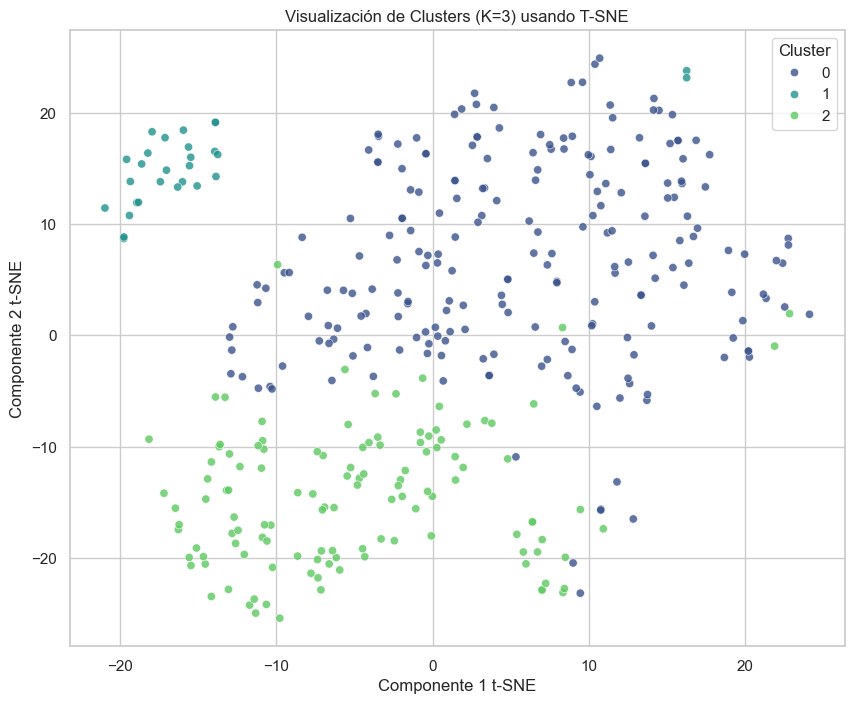

In [77]:
# --- 2. APLICAMOS T-SNE SOLO PARA VISUALIZAR EN 2 dimensiones ---
tsne_viz = TSNE(n_components=2, random_state=10, perplexity=30) 
tsne_resultados_viz = tsne_viz.fit_transform(datos_escalados_kmeans)


# --- 3. AGREGAMOS RESULTADOS DE T-SNE AL DATAFRAME TEMPORAL ---
df_para_graficar_clusters = df_con_clusters.copy()
df_para_graficar_clusters['tsne_x'] = tsne_resultados_viz[:, 0]
df_para_graficar_clusters['tsne_y'] = tsne_resultados_viz[:, 1]
df_para_graficar_clusters['Cluster'] = df_para_graficar_clusters['Cluster'].astype('category')


# --- 4. GRAFICAMOS LOS CLUSTERS CON T-SNE ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_x',
    y='tsne_y',
    hue='Cluster',  
    palette='viridis', 
    data=df_para_graficar_clusters,
    legend='full',
    alpha=0.8
)

plt.title('Visualización de Clusters (K=3) usando T-SNE')
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Componente 2 t-SNE')
plt.grid(True)
plt.show()

### 4. Validacion de hipotesis

### 4.1 Hipotesis 1 univariada
realizamos el proceso de validacion de la primer hipotesis, que es univariada

In [78]:
from scipy.stats import shapiro
from scipy.stats import wilcoxon
import numpy as np

# --- Paso A: Test de Normalidad Shapiro-Wilk --- 
muestra_pulso = df_limpio['pulso']
shapiro_stat, shapiro_p_valor = shapiro(muestra_pulso)
print(f"--- 1. Test de Normalidad de Shapiro-Wilk para 'pulso' ---")
print(f"Estadístico W: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p_valor}")

if shapiro_p_valor < 0.05:
    print(">> Los datos de 'pulso' no siguen una distribución normal (p < 0.05).")
else:
    print("Los datos de 'pulso' siguen una distribución normal (p >= 0.05).")
print("-" * 50)


# --- Paso B: Validación Hipótesis 1 --- usamos test de wilcoxon
# H0: La mediana de la muestra es = 40
# H1: La mediana de la muestra es > 40

#definimos el valor de referencia, es decir el pulso normal de los caballos
valor_normal_pulso = 40

# 2. Creamos la variable diferencia (pulso - 40), para pasar a tener 2 muestras
diferencia = muestra_pulso - valor_normal_pulso

# 3. Aplicamos el Test de Wilcoxon
wilcoxon_stat, wilcoxon_p_valor = wilcoxon(diferencia,alternative='greater')

print(f"\n--- 2. Validación H1 (Test de Wilcoxon 1 muestra) ---")
print(f"Mediana de pulso en la muestra: {muestra_pulso.median()} lpm")
print(f"Valor de referencia (mediana H0): {valor_normal_pulso} lpm")
print(f"Estadístico W: {wilcoxon_stat:.2f}")
print(f"P-valor (unilateral): {wilcoxon_p_valor}")


# 4. Interpretación del p-valor
if wilcoxon_p_valor < 0.05:
    print(f"\nResultado: El P-valor ({wilcoxon_p_valor:.2e}) es menor que 0.05.")
    print(">> Se RECHAZA la hipótesis nula (H0).")
else:
    print(f"\nResultado: El P-valor ({wilcoxon_p_valor:.2e}) es MAYOR que 0.05.")
    print(">> NO se rechaza la hipótesis nula (H0).")

--- 1. Test de Normalidad de Shapiro-Wilk para 'pulso' ---
Estadístico W: 0.8992
P-value: 7.519351204079041e-15
>> Los datos de 'pulso' no siguen una distribución normal (p < 0.05).
--------------------------------------------------

--- 2. Validación H1 (Test de Wilcoxon 1 muestra) ---
Mediana de pulso en la muestra: 60.0 lpm
Valor de referencia (mediana H0): 40 lpm
Estadístico W: 59366.00
P-valor (unilateral): 1.7097608869058983e-57

Resultado: El P-valor (1.71e-57) es menor que 0.05.
>> Se RECHAZA la hipótesis nula (H0).


### 4.2 Hipotesis 2 univariada
realizamos el proceso de validacion de la segunda hipotesis, que tambien es univariada

In [79]:
from scipy.stats import shapiro

# --- Paso A: Test de Normalidad Shapiro-Wilk ---
muestra_temp = df_limpio['temperatura_rectal']
shapiro_stat, shapiro_p_valor = shapiro(muestra_temp)
print(f"--- 1. Test de Normalidad de Shapiro-Wilk para 'temperatura_rectal' ---")
print(f"Estadístico W: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p_valor}")

if shapiro_p_valor < 0.05:
    print(">> Los datos de 'temperatura_rectal' no siguen una distribución normal (p < 0.05).")
else:
    print("Los datos de 'temperatura_rectal' siguen una distribución normal (p >= 0.05).")
print("-" * 50)


# --- Paso B: Validación Hipótesis 2 --- usamos test de wilcoxon
# H0: La mediana de la muestra es = 37.8
# H1: La mediana de la muestra es > 37.8

#definimos el valor de referencia, es decir la temperatura rectal normal de los caballos
valor_normal_temp = 37.8

# 2. Creamos la variable diferencia (temperatura_rectal - 37.8), para pasar a tener 2 muestras
diferencia = muestra_temp - valor_normal_temp

# 3. Aplicamos el Test de Wilcoxon
wilcoxon_stat, wilcoxon_p_valor = wilcoxon(diferencia,alternative='greater')

print(f"\n--- 2. Validación H1 (Test de Wilcoxon 1 muestra) ---")
print(f"Mediana de temperatura rectal en la muestra: {muestra_temp.median()} grados celsius")
print(f"Valor de referencia (mediana H0): {valor_normal_temp} grados celsius")
print(f"Estadístico W: {wilcoxon_stat:.2f}")
print(f"P-valor (unilateral): {wilcoxon_p_valor}")


# 4. Interpretación del p-valor
if wilcoxon_p_valor < 0.05:
    print(f"\nResultado: El P-valor ({wilcoxon_p_valor:.2e}) es menor que 0.05.")
    print(">> Se RECHAZA la hipótesis nula (H0).")
else:
    print(f"\nResultado: El P-valor ({wilcoxon_p_valor:.2e}) es MAYOR que 0.05.")
    print(">> NO se rechaza la hipótesis nula (H0).")

--- 1. Test de Normalidad de Shapiro-Wilk para 'temperatura_rectal' ---
Estadístico W: 0.9407
P-value: 6.438966663622262e-11
>> Los datos de 'temperatura_rectal' no siguen una distribución normal (p < 0.05).
--------------------------------------------------

--- 2. Validación H1 (Test de Wilcoxon 1 muestra) ---
Mediana de temperatura rectal en la muestra: 38.1 grados celsius
Valor de referencia (mediana H0): 37.8 grados celsius
Estadístico W: 49110.00
P-valor (unilateral): 1.0618291352088632e-25

Resultado: El P-valor (1.06e-25) es menor que 0.05.
>> Se RECHAZA la hipótesis nula (H0).


### 4.3 Hipotesis 3 bivariada
realizamos el proceso de validacion de la tercer hipotesis, en este caso bivariada

In [80]:
from scipy.stats import chi2_contingency
# Creamos la "Tabla de Contingencia" 
# Esto cuenta cuántos caballos hay en cada cruce 
# Nos aseguramos de usar los datos como 'str' para que los trate como categorías
tabla_contingencia = pd.crosstab(df_limpio['dolor'].astype(str), 
                                 df_limpio['lesión_quirúrgica'].astype(str))

print(f"--- Datos para H3 (Test Chi-Cuadrado) ---")
print("Tabla de Contingencia (Observada):")
print(tabla_contingencia)
print("-" * 40)


# --- 2. EJECUTAR EL TEST CHI-CUADRADO ---
# H0: Son independientes (no hay asociación)
# H1: No son independientes (si hay asociación)
chi2_stat, p_valor, dof, expected_freqs = chi2_contingency(tabla_contingencia)

# --- 3. IMPRIMIR RESULTADOS ---
print(f"--- Resultados Validación H3 ---")
print(f"Estadístico Chi-Cuadrado: {chi2_stat:.2f}")
print(f"P-valor: {p_valor}")
print(f"Grados de libertad (dof): {dof}")

if p_valor < 0.05:
    print(f"\nResultado: El P-valor ({p_valor:.2e}) es menor que 0.05.")
    print(">> Se RECHAZA la hipótesis nula (H0).")
    print(">> Se confirma la hipótesis: SÍ existe una asociación significativa entre el tipo de dolor y el tipo de lesión.")
else:
    print(f"\nResultado: El P-valor ({p_valor:.2e}) es MAYOR que 0.05.")
    print(">> NO se rechaza la hipótesis nula (H0).")

--- Datos para H3 (Test Chi-Cuadrado) ---
Tabla de Contingencia (Observada):
lesión_quirúrgica   1   2
dolor                    
1.0                 9  40
2.0                50  26
3.0                89  56
4.0                38   8
5.0                44   6
----------------------------------------
--- Resultados Validación H3 ---
Estadístico Chi-Cuadrado: 63.17
P-valor: 6.244384743189642e-13
Grados de libertad (dof): 4

Resultado: El P-valor (6.24e-13) es menor que 0.05.
>> Se RECHAZA la hipótesis nula (H0).
>> Se confirma la hipótesis: SÍ existe una asociación significativa entre el tipo de dolor y el tipo de lesión.


### 4.4 Hipotesis 4 bivariada
realizamos el proceso de validacion de la cuarta hipotesis, en este caso tambien bivariada

In [81]:
# Aseguramos que 'resultado' sea numérico para filtrar
df_limpio['resultado'] = pd.to_numeric(df_limpio['resultado'])

# Creamos las 3 muestras
muestra_vivio = df_limpio[df_limpio['resultado'] == 1]['pulso']
muestra_murio = df_limpio[df_limpio['resultado'] == 2]['pulso']
muestra_euta = df_limpio[df_limpio['resultado'] == 3]['pulso']

print(f"--- Validación de Normalidad (Shapiro-Wilk) por Grupo ---")

# --- 2. TESTEAR CADA GRUPO ---
# Grupo 1: Vivió
stat_v, p_v = shapiro(muestra_vivio)
print(f"\nGrupo 'Vivió' (n={len(muestra_vivio)}):")
print(f"  P-valor Shapiro: {p_v:.2e}")
if p_v < 0.05:
    print("  >> NO es Normal")
else:
    print("  >> Es Normal")

# Grupo 2: Murió
stat_m, p_m = shapiro(muestra_murio)
print(f"\nGrupo 'Murió' (n={len(muestra_murio)}):")
print(f"  P-valor Shapiro: {p_m:.2e}")
if p_m < 0.05:
    print("  >> NO es Normal")
else:
    print("  >> Es Normal")

# Grupo 3: Eutanasiado
stat_e, p_e = shapiro(muestra_euta)
print(f"\nGrupo 'Eutanasiado' (n={len(muestra_euta)}):")
print(f"  P-valor Shapiro: {p_e:.2e}")
if p_e < 0.05:
    print("  >> NO es Normal")
else:
    print("  >> Es Normal")

# --- 3. CONCLUSIÓN ---
if p_v < 0.05 or p_m < 0.05 or p_e < 0.05:
    print("\n------------------------------------------------------")
    print("Conclusión: Al menos un grupo no cumple la normalidad.")
    print(">> Se descarta ANOVA. Se debe usar Kruskal-Wallis.")
else:
    print("\n------------------------------------------------------")
    print("Conclusión: Todos los grupos son normales.")
    print(">> Se podría proceder a testear Homocedasticidad (Levene).")

--- Validación de Normalidad (Shapiro-Wilk) por Grupo ---

Grupo 'Vivió' (n=225):
  P-valor Shapiro: 1.30e-14
  >> NO es Normal

Grupo 'Murió' (n=89):
  P-valor Shapiro: 1.57e-04
  >> NO es Normal

Grupo 'Eutanasiado' (n=52):
  P-valor Shapiro: 3.39e-01
  >> Es Normal

------------------------------------------------------
Conclusión: Al menos un grupo no cumple la normalidad.
>> Se descarta ANOVA. Se debe usar Kruskal-Wallis.


In [82]:
from scipy.stats import kruskal
# Mostramos las medianas, que es lo que compara Kruskal-Wallis
print(f"--- Datos para H4 (Kruskal-Wallis) ---")
print(f"Mediana Pulso 'Vivió': {np.median(muestra_vivio):.2f} lpm")
print(f"Mediana Pulso 'Murió': {np.median(muestra_murio):.2f} lpm")
print(f"Mediana Pulso 'Eutanasiado': {np.median(muestra_euta):.2f} lpm")
print("-" * 40)

# --- 2. EJECUTAMOS EL TEST DE KRUSKAL-WALLIS ---
# H0: Las medianas son iguales
# H1: Al menos una mediana es diferente
h_stat, p_valor = kruskal(muestra_vivio, muestra_murio, muestra_euta)

# --- 3. IMPRIMIMOS LOS RESULTADOS ---
print(f"--- Resultados Validación H4 ---")
print(f"Estadístico H (Kruskal-Wallis): {h_stat:.2f}")
print(f"P-valor: {p_valor}")

if p_valor < 0.05:
    print(f"\nResultado: El P-valor ({p_valor:.2e}) es menor que 0.05.")
    print(">> Se RECHAZA la hipótesis nula (H0).")
    print(">> Se confirma la hipótesis: SÍ existen diferencias significativas en el pulso entre los 3 grupos.")
else:
    print(f"\nResultado: El P-valor ({p_valor:.2e}) es MAYOR que 0.05.")
    print(">> NO se rechaza la hipótesis nula (H0).")

--- Datos para H4 (Kruskal-Wallis) ---
Mediana Pulso 'Vivió': 55.00 lpm
Mediana Pulso 'Murió': 84.00 lpm
Mediana Pulso 'Eutanasiado': 80.00 lpm
----------------------------------------
--- Resultados Validación H4 ---
Estadístico H (Kruskal-Wallis): 58.17
P-valor: 2.3374616438295963e-13

Resultado: El P-valor (2.34e-13) es menor que 0.05.
>> Se RECHAZA la hipótesis nula (H0).
>> Se confirma la hipótesis: SÍ existen diferencias significativas en el pulso entre los 3 grupos.


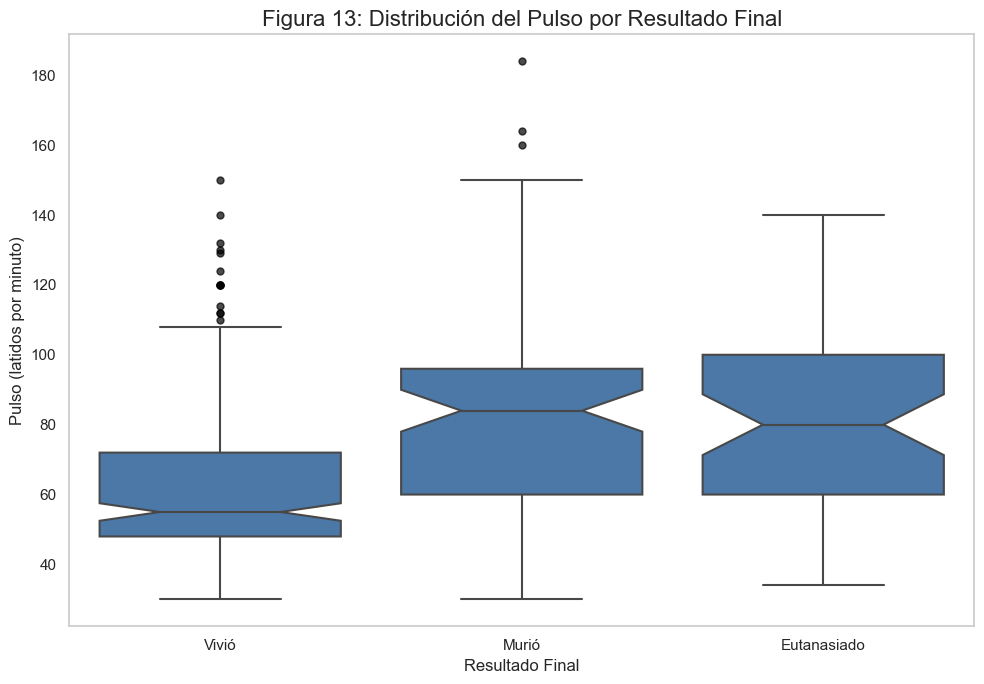

In [83]:
df_para_grafico_h4 = df_limpio.copy()

# --- 2. MAPEAMOS LOS CÓDIGOS A ETIQUETAS QUE SE ENTIENDAN ---
mapa_resultado = {
    1: 'Vivió',
    2: 'Murió',
    3: 'Eutanasiado'
}
df_para_grafico_h4['resultado_label'] = df_para_grafico_h4['resultado'].astype(float).astype(int).map(mapa_resultado)

# --- 3. CREAMOS EL GRÁFICO BOXPLOT
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df_para_grafico_h4,
    x='resultado_label',   
    y='pulso',               
    order=['Vivió', 'Murió', 'Eutanasiado'], 
    notch=True,              
    linewidth=1.5,            
    color='#3C78B5',          
    fliersize=5,              
    flierprops=dict(marker='o', markerfacecolor='black', markersize=5, markeredgecolor='black', alpha=0.7) # Estilo de outliers
)

plt.title('Figura 13: Distribución del Pulso por Resultado Final', fontsize=16)
plt.xlabel('Resultado Final', fontsize=12)
plt.ylabel('Pulso (latidos por minuto)', fontsize=12)
plt.grid(False) 
plt.tight_layout() 
plt.show()

### 4.5 Hipotesis 5 multivariada
realizamos el proceso de validacion de la quinta hipotesis, en este caso multivariada, utilizando regresion lineal

--- Datos para H5 (Regresión Lineal) ---
Variable Dependiente (y): 'pulso'
Variables Independientes (X): 6 (Dummies de 'resultado' y 'dolor')
Forma de X: (366, 6)
Forma de y: (366,)
----------------------------------------
--- 5.1 Validación VISUAL (Gráfico Q-Q) ---


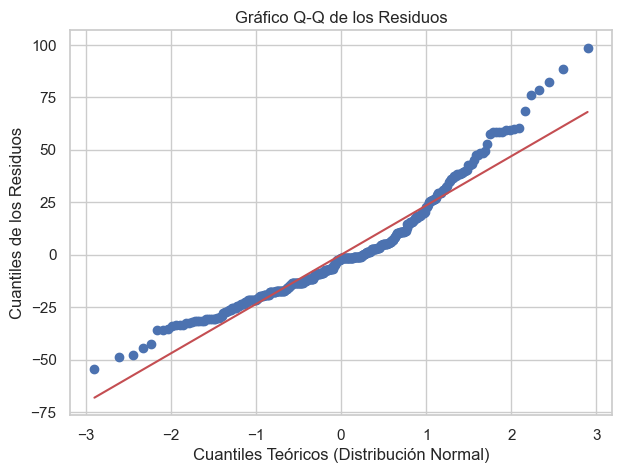


--- Shapiro-Wilk ---
Coeficiente R-cuadrado (R²): 0.2122
Test de Shapiro-Wilk sobre los Residuos:
  P-valor: 1.027279710492322e-11

Resultado H5: El P-valor (1.03e-11) es menor que 0.05.
  >> Los residuos no son normales.
  >> Se RECHAZA la hipótesis H5 (la relación no es lineal).


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import shapiro, probplot

y = df_limpio['pulso']
columnas_categoricas = ['resultado', 'dolor'] 

# Convertimos las categóricas a 'str' para que get_dummies funcione bien
df_para_dummies = df_limpio[columnas_categoricas].astype(str)

# Creamos las variables dummies
X = pd.get_dummies(df_para_dummies, drop_first=True) 


print(f"--- Datos para H5 (Regresión Lineal) ---")
print(f"Variable Dependiente (y): 'pulso'")
print(f"Variables Independientes (X): {len(X.columns)} (Dummies de 'resultado' y 'dolor')")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print("-" * 40)

# --- 3. CONSTRUIMOS EL MODELO ---
modelo_lr = LinearRegression()
modelo_lr.fit(X, y)

# --- 4. CALCULAMOS EL R-CUADRADO Y LOS RESIDUOS ---
y_predichos = modelo_lr.predict(X)
r_cuadrado = r2_score(y, y_predichos)
residuos = y - y_predichos

# --- Q-Q Plot de Residuos ---
print("--- 5.1 Validación VISUAL (Gráfico Q-Q) ---")
plt.figure(figsize=(7, 5))
probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')
plt.xlabel('Cuantiles Teóricos (Distribución Normal)')
plt.ylabel('Cuantiles de los Residuos')
plt.grid(True)
plt.show()

# --- 6. Shapiro-Wilk ---
print("\n--- Shapiro-Wilk ---")
stat_shapiro, p_valor_shapiro = shapiro(residuos)

print(f"Coeficiente R-cuadrado (R²): {r_cuadrado:.4f}")
print(f"Test de Shapiro-Wilk sobre los Residuos:")
print(f"  P-valor: {p_valor_shapiro}")

if p_valor_shapiro < 0.05:
    print(f"\nResultado H5: El P-valor ({p_valor_shapiro:.2e}) es menor que 0.05.")
    print("  >> Los residuos no son normales.")
    print("  >> Se RECHAZA la hipótesis H5 (la relación no es lineal).")
else:
    print(f"\nResultado H5: El P-valor ({p_valor_shapiro:.2e}) es MAYOR que 0.05.")
    print("  >> Los residuos son normales.")
    print("  >> Se ACEPTA la hipótesis H5.")

### 4.6 Hipotesis 6 multivariada
realizamos el proceso de validacion de la sexta y ultima hipotesis, en este caso tambien multivariada, utilizando regresion logistica

--- Datos para H6 (Regresión Logística) ---
X seleccionadas: ['pulso', 'vol_cel_empaquetado', 'dolor_2.0', 'dolor_3.0', 'dolor_4.0', 'dolor_5.0']
Forma de X (antes de escalar): (366, 6)

Target (y) 'no_vivio':
resultado
0    225
1    141
Name: count, dtype: int64
----------------------------------------
Datos divididos (80/20):
  Train: 292 muestras
  Test: 74 muestras
----------------------------------------
Modelo entrenado
----------------------------------------
--- Resultados de Evaluación H6 (sobre Test set) ---
Accuracy: 0.7703  (o 77.03%)

Matriz de Confusión (Gráfica):


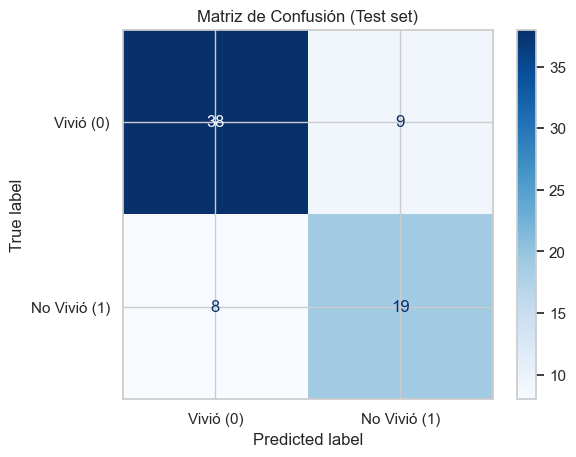

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

columnas_num = ['pulso', 'vol_cel_empaquetado']
columnas_cat = ['dolor']

# Creamos las dummies para 'dolor'
df_dummies_dolor = pd.get_dummies(df_limpio[columnas_cat].astype(str), drop_first=True)

# Unimos las numéricas y las dummies para formar nuestra 'X'
X = pd.concat([df_limpio[columnas_num], df_dummies_dolor], axis=1)

print(f"--- Datos para H6 (Regresión Logística) ---")
print(f"X seleccionadas: {list(X.columns)}")
print(f"Forma de X (antes de escalar): {X.shape}")

# Binarizamos la variable resultado 
# 0 = Vivió (resultado=1)
# 1 = No Vivió (resultado=2 o resultado=3)
y = df_limpio['resultado'].apply(lambda x: 0 if x == 1 else 1)

print(f"\nTarget (y) 'no_vivio':")
print(y.value_counts())
print("-" * 40)

# 3.1 Escalamos los datos (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.2 Dividimos en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=10)

print(f"Datos divididos (80/20):")
print(f"  Train: {X_train.shape[0]} muestras")
print(f"  Test: {X_test.shape[0]} muestras")
print("-" * 40)


# --- 4. ENTRENAMOS EL MODELO ---
# Creamos el modelo de Regresión Logística
modelo_log = LogisticRegression(random_state=10)

# Entrenamos el modelo SOLO con los datos de train
modelo_log.fit(X_train, y_train)
print("Modelo entrenado")
print("-" * 40)


# --- 5. EVALUAMOS EL MODELO ---
# Usamos el modelo para predecir sobre los datos de TEST (datos que nunca vio)
y_pred = modelo_log.predict(X_test)

# 5.1 Accuracy/exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Resultados de Evaluación H6 (sobre Test set) ---")
print(f"Accuracy: {accuracy:.4f}  (o {accuracy*100:.2f}%)")


# 5.3 Matriz de Confusión
print("\nMatriz de Confusión (Gráfica):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Vivió (0)', 'No Vivió (1)'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión (Test set)')
plt.show()